In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
#Doğrusal SVR ve Doğrusal Olmayan SVR 

In [15]:
#DOĞRUSAL SVR MODEL

In [16]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary','League','Division','NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [17]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [18]:
svr_model = SVR("linear").fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [19]:
svr_pred = svr_model.predict(X_train)#tahmin değerleri

In [20]:
svr_pred[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [21]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [22]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

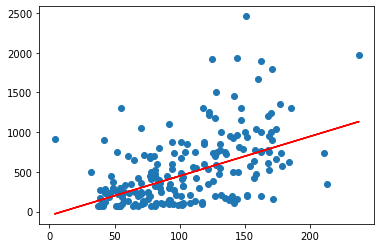

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,svr_pred,color = "r")

In [24]:
#doğrusal regresyonla tahmin edilen 461 
#SVR ile tahmin edilen 403 tür 
#aradaki farkın nedeni doğrusal regresyonda bu doğru ayrık gözlemler yüzünden 
#daha yukarı ilerlemektedir

In [25]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [26]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

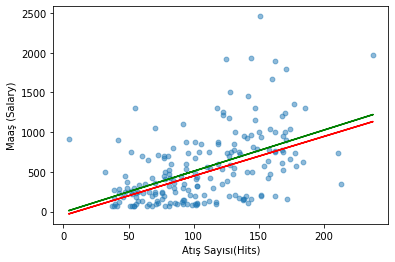

In [28]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, svr_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [12]:
#DOĞRUSAL SVR TAHMİN

In [29]:
print("y = {0} + {1}x".format(svr_model.intercept_[0],svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093x


In [30]:
svr_model.predict([[91]])

array([403.52804878])

In [32]:
y_pred = svr_model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [34]:
#DOĞRUSAL SVR MODEL TUNING

In [36]:
#tun edeceğiöiz değer c karmaşıklık parammetresidir

In [39]:
svr_params = {"C":np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [46]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [47]:
svr_tuned = SVR("linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [49]:
y_tuned_pred = svr_tuned.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test,y_tuned_pred))

458.198966781116

In [60]:
#TEK DEĞİŞKENLİ YAPTIĞIMIZ İŞLEMLERİ BÜTÜN DEĞİŞKENLERİN OLDUĞU DATASETE UYGULUYORUZ

In [52]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary','League','Division','NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [53]:
svr_params = {"C":np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [55]:
#diğerleri tek değişkenliydi şimdi bütün değişkenleri kullanarak yapıyoruz
#Gridsearchte işlemcileri bölerek çalıştırıcaz (daha karmaşık datasetlerde)

In [56]:
pd.Series(svr_cv_model.best_params_)[0]

0.4

In [57]:
svr_tuned = SVR("linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [58]:
y_tuned_pred = svr_tuned.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test,y_tuned_pred))

367.5385297249052

In [61]:
#Bu bölüme kadar aldığımız hataların en düşüğü

In [62]:
#DOĞRUSAL OLMAYAN SVR MODEL

In [65]:
#suni bir veriseti
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)#aykırı gözlemler

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [66]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))
#karşılaştırmak için doğrusal regresyon

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)#RADYEL BASES FUNCTİON DOĞRUSAL OLMAYAN FORMU
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])
#karşılaştırmak için SVR

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=rbf as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


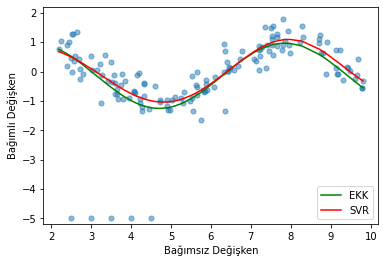

In [67]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [87]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [88]:
svr_rbf_model = SVR("rbf").fit(X_train,y_train)

In [90]:
#DOĞRUSAL OLMAYAN SVR TAHMİN

In [91]:
y_svrrbf_pred=svr_rbf_model.predict(X_test)

In [92]:
np.sqrt(mean_squared_error(y_test,y_svrrbf_pred))

460.0032657244849

In [93]:
#DOĞRUSAL OLMAYAN SVR MODEL TUNING

In [94]:
svr_params = {"C":[0.1,0.4,5,10,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf_model,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 30, 40, 50]})

In [96]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [97]:
svr_tuned = SVR("rbf", pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [98]:
np.sqrt(mean_squared_error(y_test,svr_tuned.predict(X_test)))

460.0032657244849